<a href="https://colab.research.google.com/github/amrutha2413/AI_Models_Projects/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6         1360       150      11.9   
1  10/03/2004  19.00.00     2.0         1292       112       9.4   
2  10/03/2004  20.00.00     2.2         1402        88       9.0   
3  10/03/2004  21.00.00     2.2         1376        80       9.2   
4  10/03/2004  22.00.00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836  

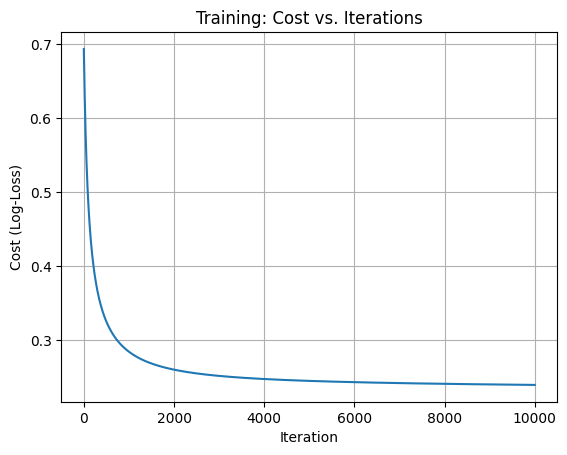

Plotting cost sensitivity for: [(np.int64(5), 'NOx(GT)'), (np.int64(4), 'PT08.S2(NMHC)'), (np.int64(7), 'NO2(GT)')]


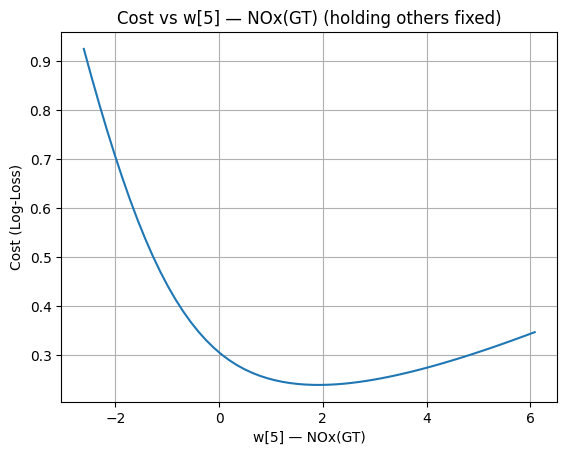

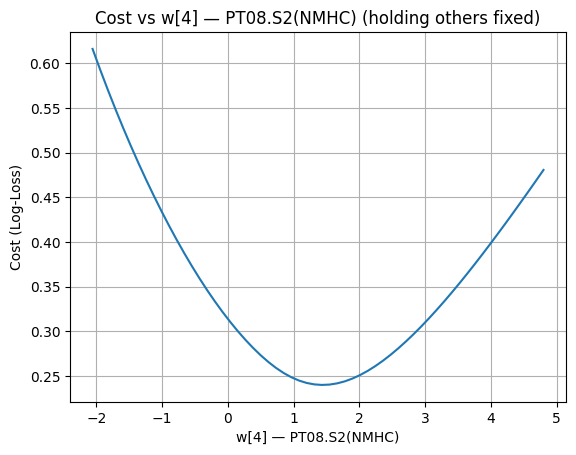

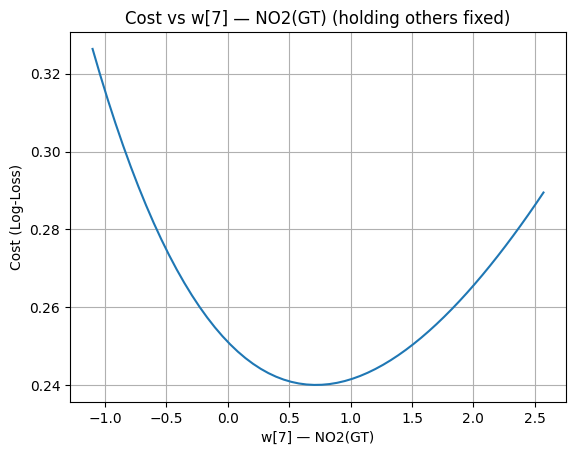

In [15]:
# ================================
# Logistic Regression (from scratch) — Skeleton
# ================================

# 0) Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# TODO: replace with your real data loading
csv_path="/content/sample_data/Air_Quality - Sheet1(1).csv"
def load_data(csv_path="/content/sample_data/Air_Quality - Sheet1(1).csv"):
    """
    Loads the Air Quality dataset and prepares X and y for logistic regression.
    Adjust target and features as needed.
    """
    df = pd.read_csv(csv_path)

    # Inspect columns
    print("Columns:", df.columns.tolist())
    print(df.head())

    # Example assumption: Predict whether CO(GT) > 2.0 ppm (binary target)
    # Modify the column name depending on what’s in your CSV
    target_col = "CO(GT)" if "CO(GT)" in df.columns else df.columns[0]
    y = (df[target_col] > 2.0).astype(int)   # 1 if CO > 2, else 0
    #logistic regression is classification so we need to convert the target into 0 and 1
    #then then we can predict other values based on this classification

    # Example features — drop target and maybe irrelevant columns
    feature_cols = [c for c in df.columns if c not in [target_col, "Date", "Time"]]
    X = df[feature_cols].apply(pd.to_numeric, errors="coerce").fillna(0).values

    #the features are the predictors which only holds numeric data (Exclude date and time)
    # Feature scaling (standardization)
    X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)
  #gradient decent cnverges much faster and its more reliable when its all on a similar scale
  #mean approx = 0
  #std approx = 1
    m = X.shape[0]

    # Add bias column
    X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
    #bias column prevents the logistic equation from going thru the origin..instead can go through the intercetp (theta otherwise known as the bias)

    print(f"Loaded {m} samples with {X.shape[1]} features (including bias).")
    return X, y

# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    # TODO: Complete the sigmoid function
    z = np.asarray(z)
    # Stable form to avoid overflow for large |z|
    pos_mask = (z >= 0)
    neg_mask = ~pos_mask

    out = np.empty_like(z, dtype=float)
    out[pos_mask] = 1.0 / (1.0 + np.exp(-z[pos_mask]))
    ez = np.exp(z[neg_mask])
    out[neg_mask] = ez / (1.0 + ez)
    return out
    #convers any real number into a prob between 0 and 1

def predict_proba(X, w):
    # p = σ(Xw)
    # TODO: Complete the predict probability function
    return sigmoid(X @ w)
    #Assumes the bias column is already in X
    #computes model's predicted probability


def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function
    p = np.clip(y_prob, eps, 1.0 - eps)
    #clipping prevents log(0) going to -infinity, this keeps loss finit and gradients stable
    return -np.mean(y_true * np.log(p) + (1.0 - y_true) * np.log(1.0 - p))
    #equation - measures how well the model's predicted probabilities match the true labels

def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function
    m = y_true.shape[0]
    return (X.T @ (y_prob - y_true)) / m
    #gradient of the loss with respect to each weight
    #Tells the hodel how to adjust weights to reduce errors


# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters
X, y = load_data() # Load data here
m, n = X.shape  #m = samples, n = features (including bias)
w = np.zeros(n)  #start with all weights = 0


# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations
learning_rate = 0.01       #how big each update step is
num_iterations = 10000     #how many gradient descent steps to run
#if learning rate is too small, training is too slow...too big, oscillates or diverges
# For tracking
cost_history = []


# 5) Gradient Descent loop
# --------------------------------------------------

for i in range(num_iterations):
    # TODO: Forward pass: compute probabilities

    # TODO: Compute loss (log-loss / cross-entropy)

    # TODO: Backward pass: compute gradient

    # TODO Parameter update


    # Forward pass: compute probabilities
    y_prob = predict_proba(X, w)

    #Compute loss (log-loss / cross-entropy)
    loss = binary_cross_entropy(y, y_prob)
    cost_history.append(loss)

    #Backward pass: compute gradient
    grad = gradient(X, y, y_prob)

    #Parameter update
    w -= learning_rate * grad

    #progress print
    if i % max(1, num_iterations // 10) == 0:
        print(f"iter {i:6d}  loss={loss:.6f}")



# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term

# (Optional) quick training accuracy check
y_hat = (y_prob >= 0.5).astype(int)
acc = (y_hat == y).mean()
print(f"Training accuracy: {acc:.4f}")


# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()


# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)


_df = pd.read_csv(csv_path)
_target_col = "CO(GT)" if "CO(GT)" in _df.columns else _df.columns[0]
_feature_cols = [c for c in _df.columns if c not in [_target_col, "Date", "Time"]]
feature_names = _df[_feature_cols].select_dtypes(include=[np.number]).columns.tolist()

#this is to make sure that the number of feature names alighed with lneght of the # of weights-1
#if not, there is an error
assert len(feature_names) == (len(w) - 1), "feature_names must align with w[1:]"

# Identify top-3 parameters by |w| (excluding bias at index 0)
param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
param_names   = [feature_names[i - 1] for i in param_indices]

print("Plotting cost sensitivity for:", list(zip(param_indices, param_names)))

def compute_cost_given_w(mod_w):
    y_hat_mod = predict_proba(X, mod_w)   # X already includes bias
    return binary_cross_entropy(y, y_hat_mod)

for idx, pname in zip(param_indices, param_names):
    center = w[idx]
    #  choose a sensible sweep range; here: ±1.0 around the trained value
    width  = max(0.5, 2.5 * max(1e-3, abs(center)))
    sweep  = np.linspace(center - width, center + width, 60)
    #sweep = np.linspace(center - 1.0, center + 1.0, 60) --> Doesn't adapt to the scale of the parameter values


    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"w[{idx}] — {pname}")                   # name shown here
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs w[{idx}] — {pname} (holding others fixed)")
    plt.grid(True)
    plt.show()



# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    #Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Example usage (remove in production):
# preds = predict_label(X, w)
# accuracy = (preds == y).mean()
# print("Training accuracy (for reference only):", accuracy)